# House Price Prediction - House Sales in King County, USA - Deep Learning (Keras)

Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction 

Author: Phuong Dai Ngo

Github: https://github.com/daiphuongngo

# Overview

This house price prediction in King County uses Keras's deep learning package with Tensorflow backend running with GPU support. No major feature engineering has taken place in this project and as a result, the MAE predicted on the Test set is $483,250.



I had applied my basic learned knowledge and experience of Deep Learning using Keras libraries into this project and read the following notebook for reference:

https://www.kaggle.com/ironfrown/deep-learning-house-price-prediction-keras?fbclid=IwAR35xswXVg15TYDP4LmjvBW4KN0cK2Os0WOrqAZFUVgrJlFjaoedLvDGwo0

# A. Preparation

## A.1 Load some standard Python libraries

In [ ]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A.2 Load Keras libraries used in this example

In [ ]:
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model

In [ ]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy import stats
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import pandas_profiling as pp

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import pearsonr

# import xgboost as xgb
# import lightgbm as lgb

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

# B. Data Engineering

## B.1 Load all data

Load data from CSV file and define the label column.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_org = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Nordic Coder/Machine Learning/House Price Prediction/data.csv")
data_org.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA



## B.2 Check NaN

In [ ]:
data_org.isna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_org = data_org.dropna()
data_org.isna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## B.3 Change features with date-time type to numeric

In [ ]:
data_org['sale_yr'] = pd.to_numeric(data_org.date.str.slice(0, 4))
data_org['sale_month'] = pd.to_numeric(data_org.date.str.slice(5, 7))
data_org['sale_day'] = pd.to_numeric(data_org.date.str.slice(8, 10))

data = pd.DataFrame(data_org, columns=[
        'sale_yr','sale_month','sale_day',
        'bedrooms',	'bathrooms',	'sqft_living',	
        'sqft_lot',	'floors',	'waterfront',	'view',	
        'condition',	'sqft_above',	'sqft_basement',	
        'yr_built',	'yr_renovated', 'price']) # remove 'street	city',	'statezip', 'country', 'lat, 'long'
label_col = 'price'

print(data.describe())

       sale_yr   sale_month  ...  yr_renovated         price
count   4600.0  4600.000000  ...   4600.000000  4.600000e+03
mean    2014.0     5.757609  ...    808.608261  5.519630e+05
std        0.0     0.683851  ...    979.414536  5.638347e+05
min     2014.0     5.000000  ...      0.000000  0.000000e+00
25%     2014.0     5.000000  ...      0.000000  3.228750e+05
50%     2014.0     6.000000  ...      0.000000  4.609435e+05
75%     2014.0     6.000000  ...   1999.000000  6.549625e+05
max     2014.0     7.000000  ...   2014.000000  2.659000e+07

[8 rows x 16 columns]


In [ ]:
# drop_columns = ['url', 'city', 'city_url', 'make', 'title_status', 'VIN', 'size', 'image_url', 'desc', 'lat','long']
# train0 = train0.drop(columns = drop_columns)

In [ ]:
data.head(5)

,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,2014,5,2,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0
1,2014,5,2,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0
2,2014,5,2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0
3,2014,5,2,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,420000.0
4,2014,5,2,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,550000.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sale_yr        4600 non-null   int64  
 1   sale_month     4600 non-null   int64  
 2   sale_day       4600 non-null   int64  
 3   bedrooms       4600 non-null   float64
 4   bathrooms      4600 non-null   float64
 5   sqft_living    4600 non-null   int64  
 6   sqft_lot       4600 non-null   int64  
 7   floors         4600 non-null   float64
 8   waterfront     4600 non-null   int64  
 9   view           4600 non-null   int64  
 10  condition      4600 non-null   int64  
 11  sqft_above     4600 non-null   int64  
 12  sqft_basement  4600 non-null   int64  
 13  yr_built       4600 non-null   int64  
 14  yr_renovated   4600 non-null   int64  
 15  price          4600 non-null   float64
dtypes: float64(4), int64(12)
memory usage: 610.9 KB


## B.4 Check null

In [ ]:
data.isnull()

,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## B.5 Label Encoding for Categorical Features

In [ ]:
# Determination categorical features
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))

In [ ]:
# Change type float in int
data['price'] = (data['price']).astype(int)
data['floors'] = (data['floors']).astype(int)
data['bedrooms'] = (data['bedrooms']).astype(int)

## B.6 Plot bar charts

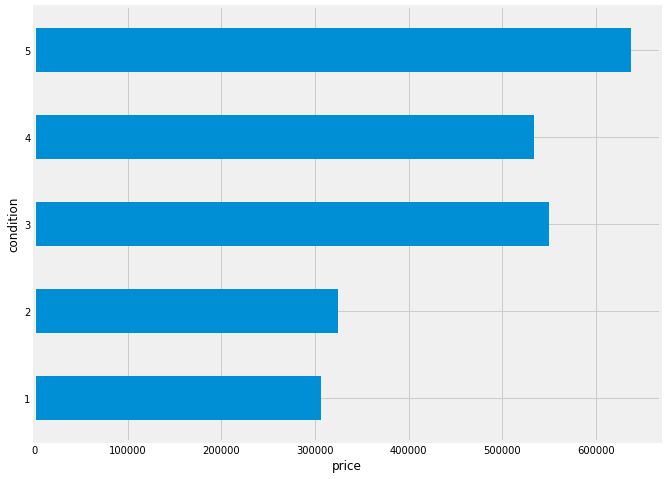

In [ ]:
groups = data.groupby(['condition'])['price'].mean()
plt.figure(figsize=(10, 8))
plt.xlabel('price')
groups.plot.barh()

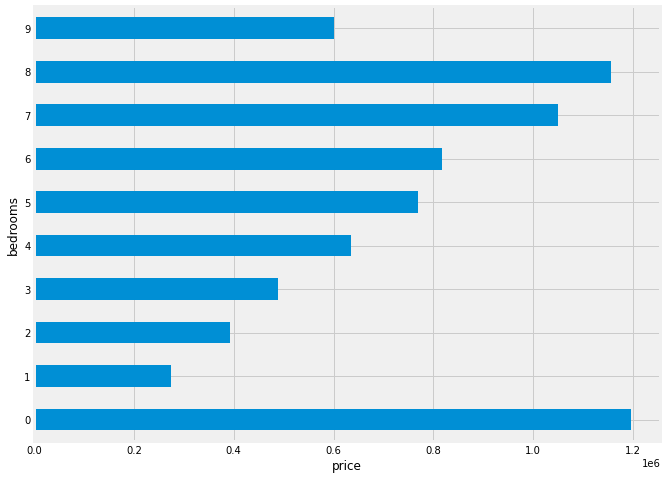

In [ ]:
groups = data.groupby(['bedrooms'])['price'].mean()
plt.figure(figsize=(10, 8))
plt.xlabel('price')
groups.plot.barh()

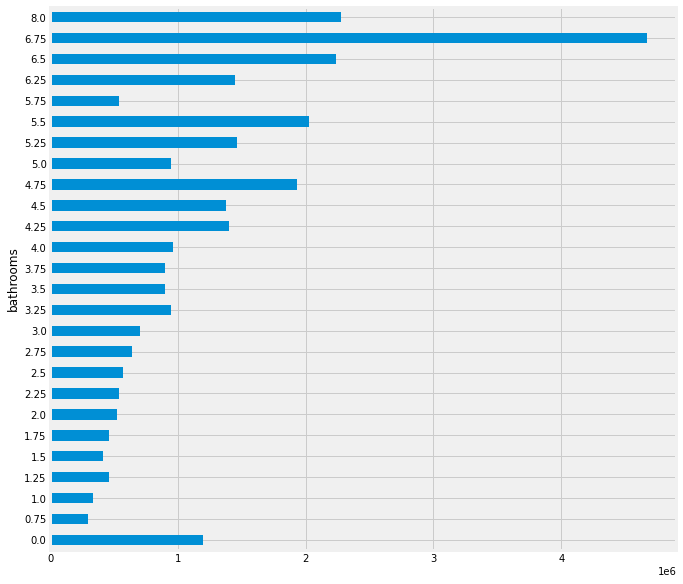

In [ ]:
groups = data.groupby(['bathrooms'])['price'].mean()
plt.figure(figsize=(10, 10))
groups.plot.barh()

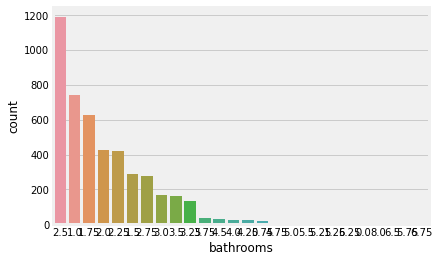

In [ ]:
sns.countplot(data.bathrooms, order = data['bathrooms'].value_counts().index)

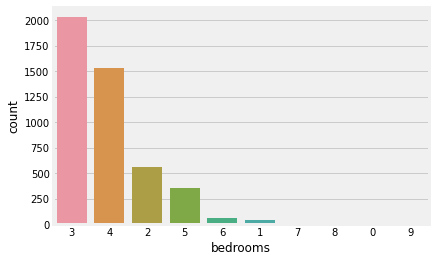

In [ ]:
sns.countplot(data.bedrooms, order = data['bedrooms'].value_counts().index)

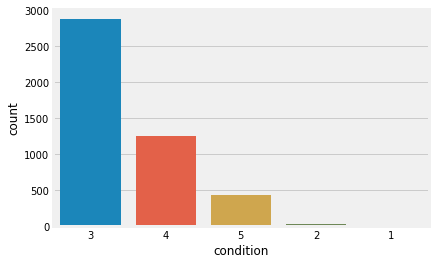

In [ ]:
sns.countplot(data.condition, order = data['condition'].value_counts().index)

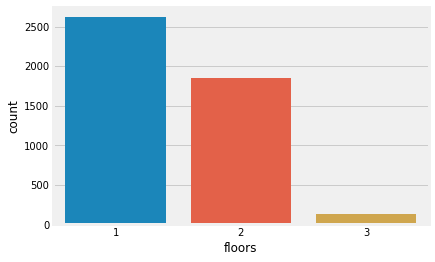

In [ ]:
sns.countplot(data.floors, order = data['floors'].value_counts().index)

## B.7 Drop NaN

In [ ]:
data = data.dropna()

In [ ]:
data.head(5)

,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,2014,5,2,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,313000
1,2014,5,2,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,2384000
2,2014,5,2,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,342000
3,2014,5,2,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,420000
4,2014,5,2,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,550000


In [ ]:
data.corr()

,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
sale_yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sale_month,NaN,1.000000,-0.348269,0.010835,0.026697,0.032825,-0.023286,0.038540,0.007530,-0.011304,0.017695,0.042919,-0.011606,0.008488,-0.023882,0.041081
sale_day,NaN,-0.348269,1.000000,-0.013073,-0.020553,-0.011772,0.010103,-0.021066,0.021342,0.040400,-0.025024,-0.009815,-0.006198,-0.017286,0.015412,-0.021544
bedrooms,NaN,0.010835,-0.013073,1.000000,0.545920,0.594884,0.068819,0.157433,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,0.200336
bathrooms,NaN,0.026697,-0.020553,0.545920,1.000000,0.761154,0.107837,0.498436,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,0.327110
sqft_living,NaN,0.032825,-0.011772,0.594884,0.761154,1.000000,0.210538,0.340993,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,0.430410
sqft_lot,NaN,-0.023286,0.010103,0.068819,0.107837,0.210538,1.000000,-0.005114,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,0.050451
floors,NaN,0.038540,-0.021066,0.157433,0.498436,0.340993,-0.005114,1.000000,0.017955,0.021116,-0.306464,0.517319,-0.253308,0.562218,-0.247150,0.137125
waterfront,NaN,0.007530,0.021342,-0.003483,0.076232,0.117616,0.017241,0.017955,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,0.135648
view,NaN,-0.011304,0.040400,0.111028,0.211960,0.311009,0.073907,0.021116,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,0.228504


# C. Visualization

## C.1 Heatmap

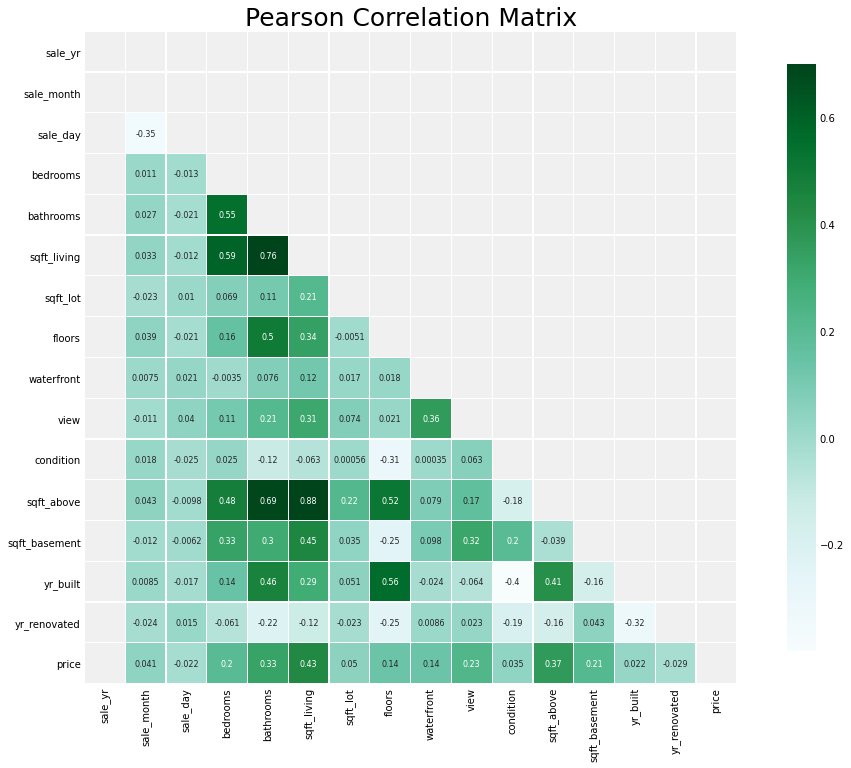

In [ ]:
# Thanks to: https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices
mask = np.zeros_like(data[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(data[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

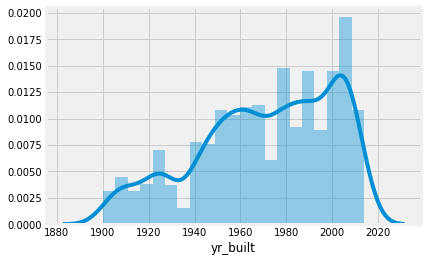

In [ ]:
sns.distplot(data['yr_built'])

In [ ]:
data.describe(percentiles=[.01, .02, .03, .05, .1, .5, .9, .92, .93, .99])

,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
count,4600.0,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03
mean,2014.0,5.757609,14.791304,3.400870,2.160815,2139.346957,1.485252e+04,1.459130,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,5.519630e+05
std,0.0,0.683851,8.677569,0.908848,0.783781,963.206916,3.588444e+04,0.552194,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,5.638347e+05
min,2014.0,5.000000,1.000000,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000e+00
1%,2014.0,5.000000,1.000000,2.000000,1.000000,720.000000,1.026950e+03,1.000000,0.000000,0.000000,3.000000,709.900000,0.000000,1903.000000,0.000000,0.000000e+00
2%,2014.0,5.000000,1.000000,2.000000,1.000000,800.000000,1.200000e+03,1.000000,0.000000,0.000000,3.000000,760.000000,0.000000,1906.000000,0.000000,1.424860e+05
3%,2014.0,5.000000,2.000000,2.000000,1.000000,860.000000,1.317820e+03,1.000000,0.000000,0.000000,3.000000,800.000000,0.000000,1909.000000,0.000000,1.699550e+05
5%,2014.0,5.000000,2.000000,2.000000,1.000000,950.000000,1.690800e+03,1.000000,0.000000,0.000000,3.000000,860.000000,0.000000,1913.000000,0.000000,2.000000e+05
10%,2014.0,5.000000,3.000000,2.000000,1.000000,1110.000000,3.300000e+03,1.000000,0.000000,0.000000,3.000000,970.000000,0.000000,1925.000000,0.000000,2.399500e+05
50%,2014.0,6.000000,14.000000,3.000000,2.250000,1980.000000,7.683000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,4.609430e+05


In [ ]:
data['price'].value_counts()

0         49
300000    42
400000    31
600000    29
450000    29
          ..
391400     1
417250     1
907500     1
234975     1
346750     1
Name: price, Length: 1741, dtype: int64

In [ ]:
data['bathrooms'].value_counts()

2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.00      23
4.25      23
0.75      17
4.75       7
5.00       6
5.50       4
5.25       4
1.25       3
6.25       2
0.00       2
8.00       1
6.50       1
5.75       1
6.75       1
Name: bathrooms, dtype: int64

In [ ]:
data['condition'].value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

In [ ]:
data['sqft_living'].value_counts()

1940    32
1720    32
1660    31
1840    31
2000    30
        ..
4200     1
4160     1
2015     1
2009     1
4110     1
Name: sqft_living, Length: 566, dtype: int64

In [ ]:
data['bedrooms'].value_counts()

3    2032
4    1531
2     566
5     353
6      61
1      38
7      14
8       2
0       2
9       1
Name: bedrooms, dtype: int64

In [ ]:
data['sale_yr'].value_counts()

2014    4600
Name: sale_yr, dtype: int64

In [ ]:
data['sale_month'].value_counts()

6    2179
5    1768
7     653
Name: sale_month, dtype: int64

In [ ]:
data['sale_day'].value_counts()

9     297
2     235
23    227
20    223
8     218
27    196
19    184
5     183
3     182
7     180
16    170
12    170
13    165
6     153
30    141
26    139
25    136
10    134
24    131
28    124
1     123
17    114
4     107
18    106
21    102
22    102
11     92
14     89
15     89
29     82
31      6
Name: sale_day, dtype: int64

In [ ]:
data['condition'].value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

## C.2 Remove outliers

In [ ]:
data = data[(
                (data['price'] <= 1000000) & 
                (data['price'] > 150000) & 
                (data['bathrooms'] <= 6) & 
                (data['condition'] > 2) & 
                (data['sqft_living'] > 800) & 
                (data['bedrooms'] >= 1) & 
                (data['bedrooms'] <= 7) 
                )]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sale_yr        4040 non-null   int64  
 1   sale_month     4040 non-null   int64  
 2   sale_day       4040 non-null   int64  
 3   bedrooms       4040 non-null   int64  
 4   bathrooms      4040 non-null   float64
 5   sqft_living    4040 non-null   int64  
 6   sqft_lot       4040 non-null   int64  
 7   floors         4040 non-null   int64  
 8   waterfront     4040 non-null   int64  
 9   view           4040 non-null   int64  
 10  condition      4040 non-null   int64  
 11  sqft_above     4040 non-null   int64  
 12  sqft_basement  4040 non-null   int64  
 13  yr_built       4040 non-null   int64  
 14  yr_renovated   4040 non-null   int64  
 15  price          4040 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 536.6 KB


## C.3 Plot 3 charts of 'price' vs all other features

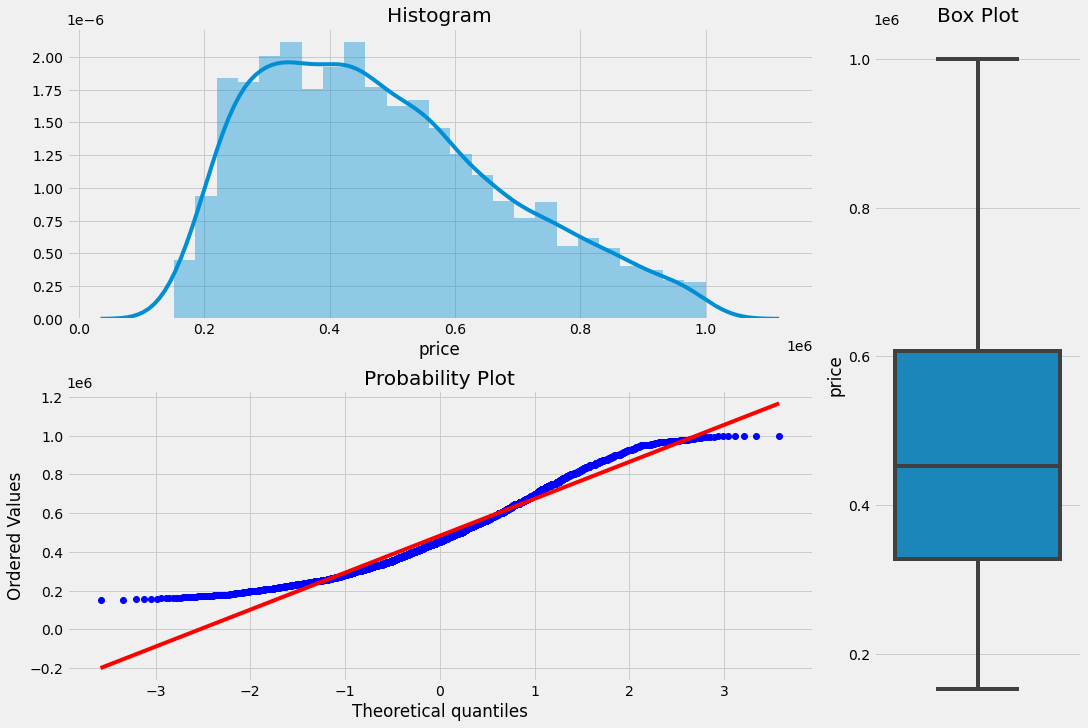

In [ ]:
# Inspired by: https://www.kaggle.com/vbmokin/used-cars-fe-eda-with-3d
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # Customizing the QQ_plot
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the Box Plot
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(data, 'price')

## C.4 Plot box plot of 'price' & 'index'

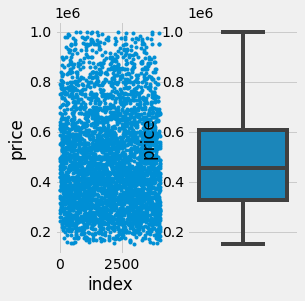

In [ ]:
# Inspired by: https://www.kaggle.com/vbmokin/used-cars-fe-eda-with-3d
y = np.array(data.price)
plt.subplot(131)
plt.plot(range(len(y)),y,'.');
plt.ylabel('price');
plt.xlabel('index');
plt.subplot(132)
sns.boxplot(y=data.price)

## C.5 Plot 3D chart

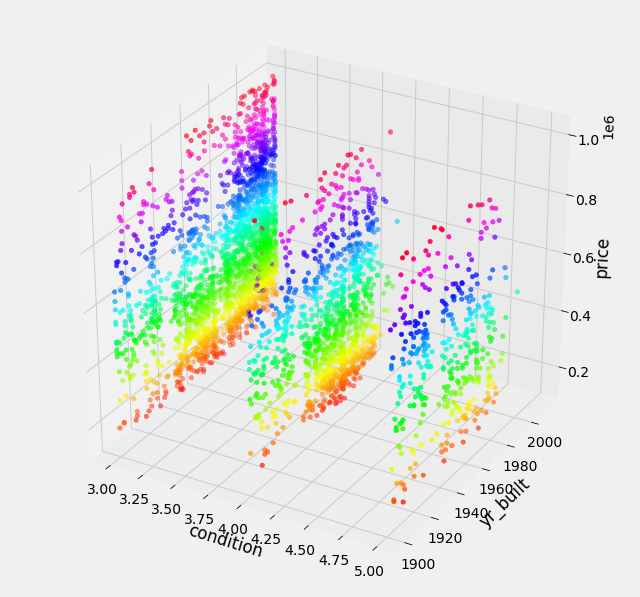

In [ ]:
# Inspired by https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = data['price']
x_points = data['condition']
y_points = data['yr_built']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_xlabel('condition')
ax.set_ylabel('yr_built')
ax.set_zlabel('price')

plt.show()

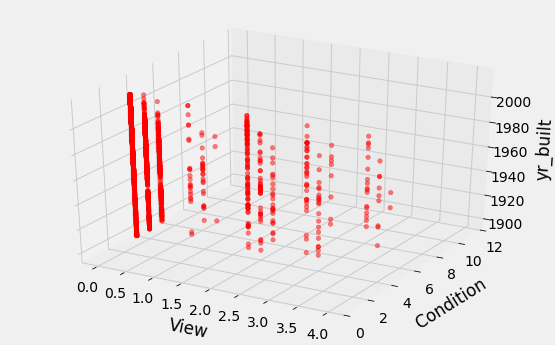

In [ ]:
# Inspired by: https://www.kaggle.com/shanroy1999/house-price-prediction-using-linear-regression
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(data['view'],data['condition'],data['yr_built'],c="red",alpha=.5)
ax.set(xlabel='\nView',ylabel='\nCondition',zlabel='\nyr_built')
ax.set(ylim=[0,12])
plt.show()

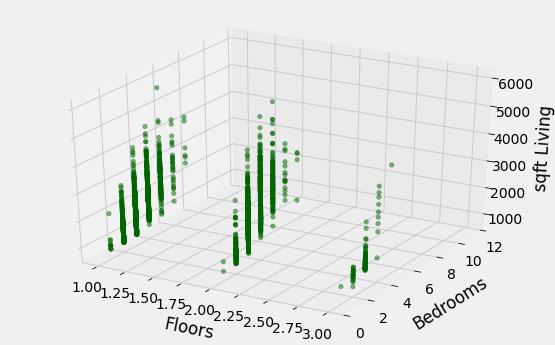

In [ ]:
# Inspired by: https://www.kaggle.com/shanroy1999/house-price-prediction-using-linear-regression
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(data['floors'],data['bedrooms'],data['sqft_living'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])
plt.show()

In [ ]:
# Inspired by: https://www.kaggle.com/shanroy1999/house-price-prediction-using-linear-regression
grpby_bedrooms_df = data[["price", "bedrooms"]].groupby(by = "bedrooms", as_index = False)
grpby_bedrooms_df = grpby_bedrooms_df.mean().astype(int)
grpby_bedrooms_df.head()

,bedrooms,price
0,1,344921
1,2,409449
2,3,444431
3,4,547698
4,5,563318


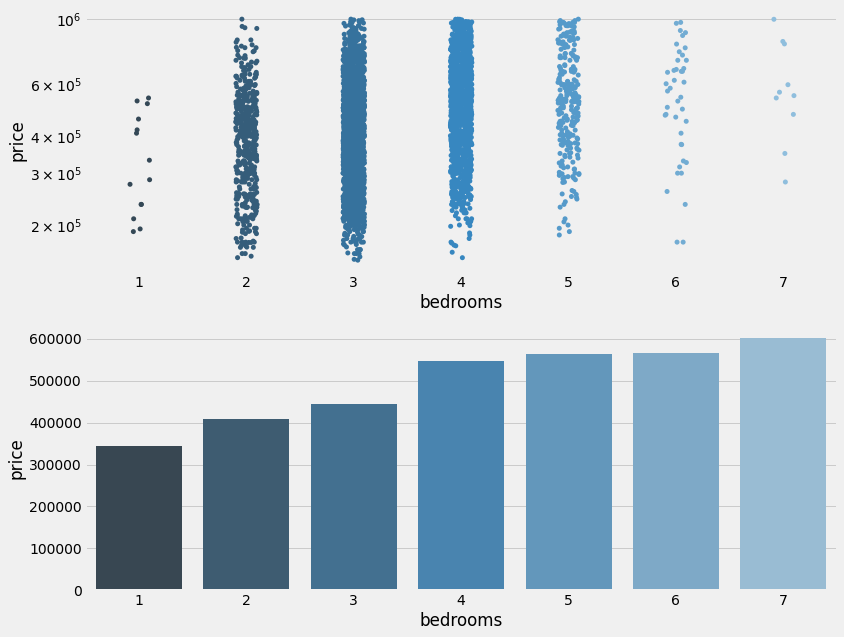

In [ ]:
# Inspired by: https://www.kaggle.com/shanroy1999/house-price-prediction-using-linear-regression
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.set(yscale = "log")
sns.stripplot(x = "bedrooms", y = "price", data = data, ax = ax1, jitter=True, palette="Blues_d")
sns.barplot(x = "bedrooms", y = "price", data = grpby_bedrooms_df, ax = ax2, palette="Blues_d")
plt.show()

In [ ]:
data['price']

0       313000
2       342000
3       420000
4       550000
5       490000
         ...  
4595    308166
4596    534333
4597    416904
4598    203400
4599    220600
Name: price, Length: 4040, dtype: int64

# D. Scaling data

## D.1 Create X, y

In [ ]:
np_data = data.values
print('np_data: ', np_data)
print('np_data shape: ', np_data.shape)
X = np_data[:, :15]
print('X: ', X)
y = np_data[:,-1]
print('y: ', y)

np_data:  [[2.01400e+03 5.00000e+00 2.00000e+00 ... 1.95500e+03 2.00500e+03
  3.13000e+05]
 [2.01400e+03 5.00000e+00 2.00000e+00 ... 1.96600e+03 0.00000e+00
  3.42000e+05]
 [2.01400e+03 5.00000e+00 2.00000e+00 ... 1.96300e+03 0.00000e+00
  4.20000e+05]
 ...
 [2.01400e+03 7.00000e+00 9.00000e+00 ... 2.00900e+03 0.00000e+00
  4.16904e+05]
 [2.01400e+03 7.00000e+00 1.00000e+01 ... 1.97400e+03 0.00000e+00
  2.03400e+05]
 [2.01400e+03 7.00000e+00 1.00000e+01 ... 1.99000e+03 0.00000e+00
  2.20600e+05]]
np_data shape:  (4040, 16)
X:  [[2.014e+03 5.000e+00 2.000e+00 ... 0.000e+00 1.955e+03 2.005e+03]
 [2.014e+03 5.000e+00 2.000e+00 ... 0.000e+00 1.966e+03 0.000e+00]
 [2.014e+03 5.000e+00 2.000e+00 ... 1.000e+03 1.963e+03 0.000e+00]
 ...
 [2.014e+03 7.000e+00 9.000e+00 ... 0.000e+00 2.009e+03 0.000e+00]
 [2.014e+03 7.000e+00 1.000e+01 ... 1.020e+03 1.974e+03 0.000e+00]
 [2.014e+03 7.000e+00 1.000e+01 ... 0.000e+00 1.990e+03 0.000e+00]]
y:  [313000. 342000. 420000. ... 416904. 203400. 220600.]


## D.2 Split the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=1612) 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,test_size=0.5, shuffle=True, random_state=1612) 

## D.3 Check unique values

In [ ]:
print(len(np.unique(y_train, return_counts=True)[0]))
print(len(np.unique(y_train, return_counts=True)[1]))
print(len(np.unique(y_val, return_counts=True)[0]))
print(len(np.unique(y_val, return_counts=True)[1]))
print(len(np.unique(y_test, return_counts=True)[0]))
print(len(np.unique(y_test, return_counts=True)[1]))

1052
1052
489
489
523
523


## D.4 Function of drawing history chart

In [ ]:
def draw_chart(history):
  plt.figure(figsize=(15,8))
  
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Losses vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'])

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Validation'])

In [ ]:
print('Type of x_train: ', X_train.dtype)

Type of x_train:  float64


In [ ]:
print('Min of X_train: ', np.min(X_train))
print('Max of X_train: ', np.max(X_train))

Min of X_train:  0.0
Max of X_train:  1074218.0


## D.5 Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)
print('y_val shape: ', y_val.shape)

x_scale = StandardScaler()
X_train_scaled = x_scale.fit_transform(X_train)
X_test_scaled = x_scale.transform(X_test)
X_val_scaled = x_scale.transform(X_val)
print('X_train_scaled shape: ', X_train_scaled.shape)
print('X_test_scaled shape: ', X_test_scaled.shape)
print('X_val_scaled shape: ', X_val_scaled.shape)

y_scale = StandardScaler()
y_train_scaled = y_scale.fit_transform(y_train)
y_test_scaled = y_scale.transform(y_test)
y_val_scaled = y_scale.transform(y_val)
print('y_train_scaled shape: ', y_train_scaled.shape)
print('y_test_scaled shape: ', y_test_scaled.shape)
print('y_val_scaled shape: ', y_val_scaled.shape)

y_train shape:  (2424, 1)
y_test shape:  (808, 1)
y_val shape:  (808, 1)
X_train_scaled shape:  (2424, 15)
X_test_scaled shape:  (808, 15)
X_val_scaled shape:  (808, 15)
y_train_scaled shape:  (2424, 1)
y_test_scaled shape:  (808, 1)
y_val_scaled shape:  (808, 1)


# E. Modelling

## E.1 Train Model Function

In [ ]:
def train_model(model, epochs):
  history = model.fit(X_train_scaled, y_train_scaled, epochs=10, verbose=0) # if epochs are larger, turn off verbose (verbose=1), then evaluate # https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model
  print(model.evaluate(X_train_scaled, y_train_scaled))  
  loss.extend(history.history['loss'])
  acc.extend(history.history['accuracy'])

## E.2 Create a Neural Network model

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor # This is a Regression algorithm so we use KerasRegressor

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt

def create_model(optimizer='sgd', learning_rate=0.01, momentum=0.9):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=X_train.shape[1:]))
  model.add(Dense(128, activation='relu')) # Underfit: increase node / layer (increase number of params) # Overfit: decrease node / layer (decrease number of params)
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='linear'))
  my_optim=None
  if optimizer == 'adam':
    # lưu ý trong trường hợp optimizer là adam sẽ không có tham số learning_rate
    my_optim = Adam(learning_rate=learning_rate)
  elif optimizer == 'sgd':
    my_optim = SGD(learning_rate=learning_rate, momentum=momentum)
  elif optimizer == 'rmsprop':
    my_optim = RMSprop(learning_rate=learning_rate, momentum=momentum)
  
  model.compile(loss='mse', optimizer=my_optim, metrics=['mae',RootMeanSquaredError()])
  return model

In [ ]:
X_train_scaled.shape # 15 features: 2028 = 15*128 + 128

(2424, 15)

In [ ]:
2048/128

16.0

In [ ]:
128*128 + 128

16512

In [ ]:
model.summary()

NameError: ignored

## E.3 Apply GridSearchCV on the model

In [ ]:
# define the grid search parameters
optimizer_values = ['adam', 'sgd', 'rmsprop']
lr_values = [0.01, 0.1] # --> exponential decay iso learning rate: giảm theo cấp số mũ
momentum_values = [0.0, 0.9]

param_grid = {
    'optimizer': optimizer_values,
    'learning_rate': lr_values,
    'momentum': momentum_values
}

In [ ]:
model = KerasRegressor(build_fn=create_model, epochs=80, verbose=1)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train_scaled)
print("Best model using: %s" % (grid_result.best_params_))

Epoch 1/80
76/76 [==============================] - 0s 1ms/step - loss: 0.7756 - mae: 0.7221 - root_mean_squared_error: 0.8807
Epoch 2/80
76/76 [==============================] - 0s 1ms/step - loss: 0.6127 - mae: 0.6397 - root_mean_squared_error: 0.7827
Epoch 3/80
76/76 [==============================] - 0s 1ms/step - loss: 0.5768 - mae: 0.6132 - root_mean_squared_error: 0.7595
Epoch 4/80
76/76 [==============================] - 0s 1ms/step - loss: 0.5587 - mae: 0.6025 - root_mean_squared_error: 0.7474
Epoch 5/80
76/76 [==============================] - 0s 1ms/step - loss: 0.5471 - mae: 0.5937 - root_mean_squared_error: 0.7397
Epoch 6/80
76/76 [==============================] - 0s 1ms/step - loss: 0.5385 - mae: 0.5876 - root_mean_squared_error: 0.7338
Epoch 7/80
76/76 [==============================] - 0s 1ms/step - loss: 0.5325 - mae: 0.5842 - root_mean_squared_error: 0.7297
Epoch 8/80
76/76 [==============================] - 0s 1ms/step - loss: 0.5263 - mae: 0.5812 - root_mean_square

## E.4 Best hyper-parameters

In [ ]:
best_model = grid_result.best_estimator_

## E.5 Evaluate the best model

In [ ]:
best_model.model.evaluate(X_val_scaled, y_val_scaled) # validation, not test set. Test set đo cuối

26/26 [==============================] - 0s 1ms/step - loss: 0.6489 - mae: 0.6400 - root_mean_squared_error: 0.8055


[0.6488810777664185, 0.6400459408760071, 0.8055315613746643]

In [ ]:
best_model.model.evaluate(X_test_scaled, y_test_scaled) 

26/26 [==============================] - 0s 1ms/step - loss: 0.6773 - mae: 0.6350 - root_mean_squared_error: 0.8230


[0.6772691607475281, 0.6350145936012268, 0.8229636549949646]

## E.6 MAE

In [ ]:
# So sánh MAE của y_test_scaled và y_pred_inverse
# metrics là thước đó để đánh giá performance của model nhưng metrics = bao nhiu thì chấp nhận đc là do mình tự define ra
y_pred = best_model.predict(X_test_scaled)
y_pred_inverse = y_scale.inverse_transform(y_pred) # do đã scale nên muốn xem giá nhà thực tế bằng $ thì inverse_transform

from tensorflow.keras.metrics import MeanAbsoluteError
mae = MeanAbsoluteError()
print('MAE: ', mae(y_test_scaled, y_pred_inverse))

26/26 [==============================] - 0s 917us/step
MAE:  tf.Tensor(483250.7, shape=(), dtype=float32)


## E.7 RMSE

In [ ]:
# So sánh RMSE của y_test_scaled và y_pred_inverse
from tensorflow.keras.metrics import MeanSquaredError
import math
mse = MeanSquaredError()
print('RMSE: ', math.sqrt(mse(y_test_scaled, y_pred_inverse)))

RMSE:  507883.64475340216


## E.8 Conclusion:

The model's MAE predicted on Test set = $483,250. (Tổng sai số dự đoán/thực tế)

Scaled MAE = 0.635.

Test set has 808 samples.

MAE of 808 samples = 483,250 * 808 = $52,406,900.

RMSE of 808 samples = 507,883 * 808 = $410,369,464.

In [ ]:
y_test.shape

(808, 1)

## E.9 Test previous model with best hyper-parameters

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
my_optim=SGD(learning_rate = 0.01, momentum = 0.0) # edited
model.compile(loss='mse', optimizer=my_optim, metrics=['mae',RootMeanSquaredError()])
history = model.fit(X_train_scaled, y_train_scaled, epochs=300)

Epoch 1/300
76/76 [==============================] - 0s 1ms/step - loss: 0.7307 - mae: 0.7022 - root_mean_squared_error: 0.8548
Epoch 2/300
76/76 [==============================] - 0s 1ms/step - loss: 0.6007 - mae: 0.6269 - root_mean_squared_error: 0.7751
Epoch 3/300
76/76 [==============================] - 0s 2ms/step - loss: 0.5752 - mae: 0.6096 - root_mean_squared_error: 0.7584
Epoch 4/300
76/76 [==============================] - 0s 1ms/step - loss: 0.5548 - mae: 0.5944 - root_mean_squared_error: 0.7449
Epoch 5/300
76/76 [==============================] - 0s 1ms/step - loss: 0.5486 - mae: 0.5923 - root_mean_squared_error: 0.7407
Epoch 6/300
76/76 [==============================] - 0s 1ms/step - loss: 0.5412 - mae: 0.5871 - root_mean_squared_error: 0.7356
Epoch 7/300
76/76 [==============================] - 0s 1ms/step - loss: 0.5345 - mae: 0.5836 - root_mean_squared_error: 0.7311
Epoch 8/300
76/76 [==============================] - 0s 2ms/step - loss: 0.5299 - mae: 0.5804 - root_mea

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'root_mean_squared_error'])


In [ ]:
def draw_chart(history):
  plt.figure(figsize=(15,8))
  
  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.title('Losses vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

  plt.subplot(1,3,2)
  plt.plot(history.history['mae'])
  plt.title('MAE vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('MAE')

  plt.subplot(1,3,3)
  plt.plot(history.history['root_mean_squared_error'])
  plt.title('RMSE vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('RMSE')

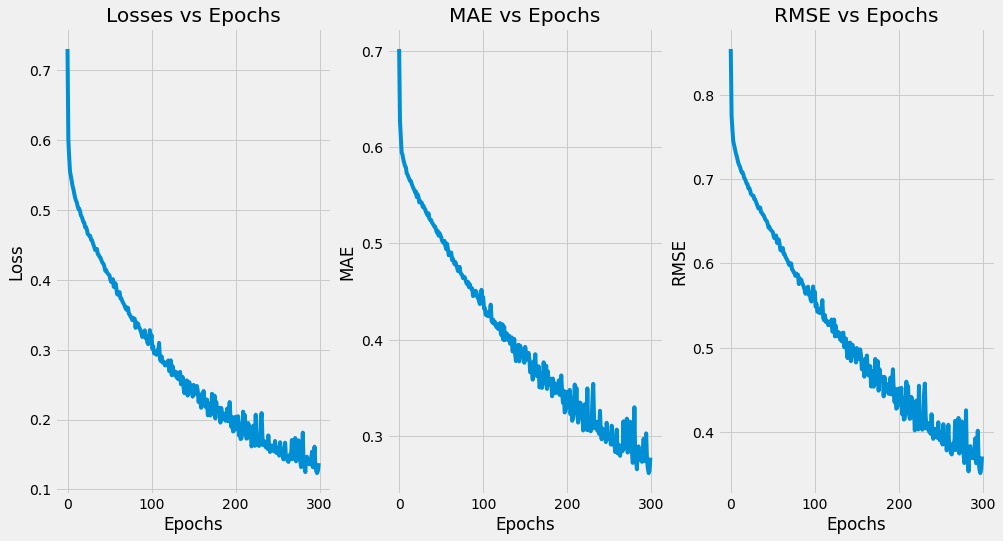

In [ ]:
draw_chart(history)

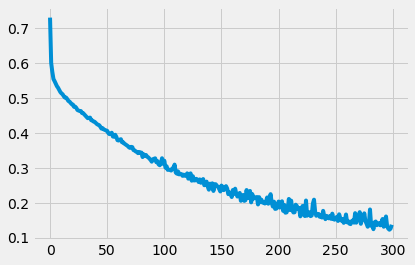

In [ ]:
plt.plot(history.history['loss'])

According to the charts above (x: epochs, y: loss), they have reached the model's limitation so even if we trained it more, the result would still be quite the same.

Loss, mae, mse after each training epoch will be kind of similar.

## E.10 Tuning the model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
#tuned_model = model(X_train.shape[1:])
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# model = tuned_model
tuned_history = model.fit(X_train_scaled, y_train_scaled, epochs=1000, validation_data=(X_val_scaled, y_val_scaled), batch_size=512, shuffle=True, callbacks=[early_stop]) # để sau cùng: truyền vào array
#tuned_history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), batch_size=512, shuffle=True, callbacks=[early_stop]) # để sau cùng: truyền vào array

Epoch 1/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.1114 - mae: 0.2462 - root_mean_squared_error: 0.3337 - val_loss: 0.8315 - val_mae: 0.7096 - val_root_mean_squared_error: 0.9118
Epoch 2/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.1019 - mae: 0.2333 - root_mean_squared_error: 0.3192 - val_loss: 0.8038 - val_mae: 0.6998 - val_root_mean_squared_error: 0.8966
Epoch 3/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0918 - mae: 0.2167 - root_mean_squared_error: 0.3030 - val_loss: 0.8087 - val_mae: 0.7025 - val_root_mean_squared_error: 0.8993
Epoch 4/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.0911 - mae: 0.2140 - root_mean_squared_error: 0.3018 - val_loss: 0.8179 - val_mae: 0.7051 - val_root_mean_squared_error: 0.9044
Epoch 5/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.0882 - mae: 0.2095 - root_mean_squared_error: 0.2970 - val_loss: 0.8114 - val_mae: 0.7032 - val_root_mean_squared_er


## E.11 Plot the tuned history

In [ ]:
def draw_chart(history):
  plt.figure(figsize=(15,8))
  
  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Losses vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train', 'Validation'])

  plt.subplot(1,3,2)
  plt.plot(history.history['mae'])
  plt.plot(history.history['val_mae'])
  plt.title('MAE vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('MAE')
  plt.legend(['Train', 'Validation'])

  plt.subplot(1,3,3)
  plt.plot(history.history['root_mean_squared_error'])
  plt.plot(history.history['val_root_mean_squared_error'])
  plt.title('RMSE vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('RMSE')
  plt.legend(['Train', 'Validation'])  

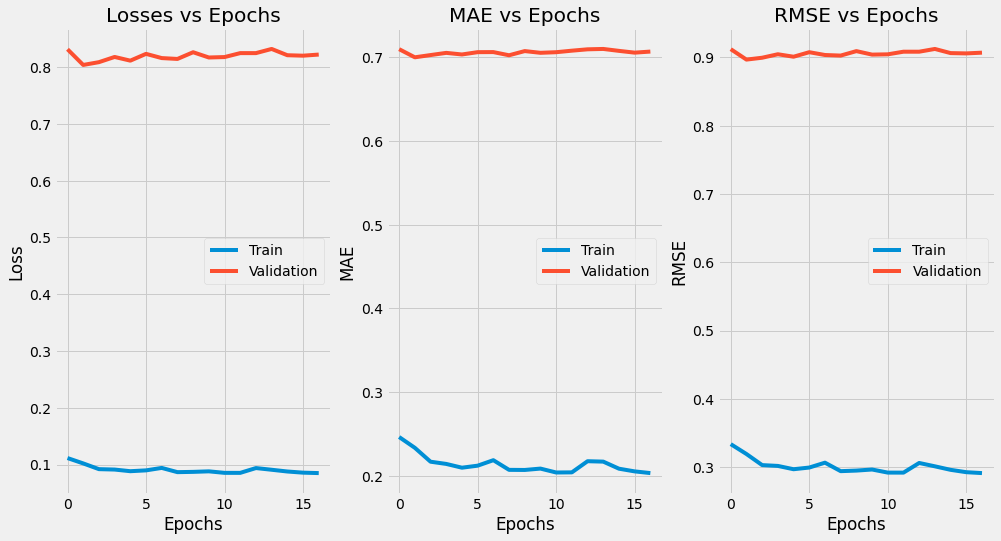

In [ ]:
draw_chart(tuned_history)

## E.12 Evalute the model after using best hyper-parameters

### E.12.1 Scaled

In [ ]:
model.evaluate(X_train_scaled, y_train_scaled)
model.evaluate(X_val_scaled, y_val_scaled)
model.evaluate(X_test_scaled, y_test_scaled)

26/26 [==============================] - 0s 1ms/step - loss: 0.8986 - mae: 0.7122 - root_mean_squared_error: 0.9479


[0.8986018896102905, 0.7122194766998291, 0.9479461312294006]

## E.12.2 Not scaled

In [ ]:
model.evaluate(X_train, y_train)
model.evaluate(X_val, y_val)
model.evaluate(X_test, y_test)

26/26 [==============================] - 0s 1ms/step - loss: 284275113984.0000 - mae: 492634.9375 - root_mean_squared_error: 533174.5625


[284275113984.0, 492634.9375, 533174.5625]